In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *

In [8]:
# grid problem from example 1

# states
# we include the block locations 4 and 11 for convenience of coding; though they will never be reached
states = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17] # s = 17 is the EXIT state
NS = len(states) # number of states

# actions
actions = ['up', 'down', 'left', 'right', 'stop']
NA = len(actions) # number of actions

# rewards
reward = -0.1*np.ones(NS)
reward[7] = -10 # reward at state s = 8
reward[15] = +10 # reward at state s = 16
reward[16] = 0 # reward at exit satate s = 17

# target policy pi(a|s)
Pi = np.zeros((NA, NS)) # matrix Pi specifies the policy pi(a|s)
                      # each row is an action; each column is a state

for j in range(NS):
    s = states[j]
    if s in [1, 2, 3, 5, 6, 7, 9, 10, 12, 13, 14, 15]:
        Pi[0,j] = 1/4 # up
        Pi[1,j] = 1/4 # down
        Pi[2,j] = 1/4 # left
        Pi[3,j] = 1/4 # right
        Pi[4,j] = 0  # STOP
    
    else:
        Pi[0,j] = 0 # up
        Pi[1,j] = 0 # down
        Pi[2,j] = 0 # left
        Pi[3,j] = 0 # right
        Pi[4,j] = 1 # STOP

# transition kernel
P = np.zeros((NS, NA, NS)) # entries are Prob(s, a, s')

P[0, 0, 0] = 0.15 # start at s=1, move UP, end in state 1
P[0, 0, 1] = 0.15
P[0, 0, 7] = 0.7

P[0, 1, 0] = 0.85 # start at s=1, move DOWN, end in state 1
P[0, 1, 1] = 0.15

P[0,2,0] = 0.15 # start at s=1, move LEFT, end in state 1
P[0,2,1] = 0.70
P[0,2,7] = 0.15

P[0,3,0] = 0.85 # start at s=1, move RIGHT, end in state 1
P[0,3,7] = 0.15

P[1,0,0] = 0.15  # start at s=2, move UP, end in state 1
P[1,0,2] = 0.15
P[1,0,6] = 0.70

P[1,1,0] = 0.15  # start at s=2, move DOWN, end in state 1
P[1,1,2] = 0.15
P[1,1,1] = 0.70
                
P[1,2,2] = 0.70  # start at s=2, move LEFT, end in state 3                  
P[1,2,6] = 0.15
P[1,2,1] = 0.15

P[1,3,0] = 0.70   # start at s=2, move RIGHT, end in state 1 
P[1,3,6] = 0.15
P[1,3,1] = 0.15

P[2,0,5] = 0.70   # start at s=3, move UP
P[2,0,2] = 0.15
P[2,0,1] = 0.15

P[2,1,2] = 0.85  # start at s=3, move DOWN
P[2,1,1] = 0.15

P[2,2,2] = 0.85  # start at s=3, move LEFT
P[2,2,5] = 0.15 

P[2,3,1] = 0.70   # start at s=3, move RIGHT
P[2,3,5] = 0.15
P[2,3,4] = 0.15

P[4,0,11] = 0.70  # start at s=5, move UP
P[4,0,4]  = 0.15
P[4,0,5]  = 0.15

P[3,0,3] = 1 # values for location 4 this state is never reached
P[3,1,3] = 1 # so these values are irrelevant
P[3,2,3] = 1
P[3,3,3] = 1
P[3,4,3] = 1

P[4,1,4] = 0.85  # start at s=5, move DOWN
P[4,1,5] = 0.15

P[4,2,4]  = 0.85  # start at s=5, move LEFT
P[4,2,11] = 0.15

P[4,3,5]  = 0.70  # start at s=5, move RIGHT
P[4,3,11] = 0.15
P[4,3,4]  = 0.15

P[5,0,4] = 0.15   # start at s=6, move UP
P[5,0,5] = 0.70
P[5,0,6] = 0.15

P[5,1,2] = 0.70    # start at s=6, move DOWN
P[5,1,4] = 0.15
P[5,1,6] = 0.15

P[5,2,4] = 0.70   # start at s=6, move LEFT
P[5,2,5] = 0.15
P[5,2,2] = 0.15

P[5,3,6] = 0.70   # start at s=6, move RIGHT
P[5,3,5] = 0.15
P[5,3,2] = 0.15

P[6,0,9] = 0.70  # start at s=7, move UP
P[6,0,5]  = 0.15
P[6,0,7]  = 0.15

P[6,1,1] = 0.70  # start at s=7, move DOWN
P[6,1,5] = 0.15
P[6,1,7] = 0.15

P[6,2,5]  = 0.70 # start at s=7, move LEFT
P[6,2,9] = 0.15
P[6,2,1]  = 0.15

P[6,3,7] = 0.70  # start at s=7, move RIGHT
P[6,3,1] = 0.15
P[6,3,9] = 0.15

P[7,0,16] = 0   # start at s=8 [DANGER] EXIT
P[7,1,16] = 0
P[7,2,16] = 0
P[7,3,16] = 0
P[7,4,16] = 1 #STOP action

P[8,0,15] = 0.70   # start at s=9 move UP
P[8,0,9] = 0.15
P[8,0,8]  = 0.15

P[8,1,7]  = 0.70   # start at s=9 move DOWN
P[8,1,9] = 0.15
P[8,1,8]  = 0.15

P[8,2,9] = 0.70  # start at s=9 move LEFT
P[8,2,15] = 0.15
P[8,2,7]  = 0.15

P[8,3,8]  = 0.70  # start at s=9 move RIGHT
P[8,3,7]  = 0.15
P[8,3,15] = 0.15

P[9,0,14] = 0.70   # start at s=10 move UP
P[9,0,8]  = 0.15
P[9,0,9] = 0.15

P[9,1,6]  = 0.70  # start at s=10 move DOWN
P[9,1,8]  = 0.15
P[9,1,9] = 0.15

P[9,2,9] = 0.70  # start at s=10 move LEFT
P[9,2,14] = 0.15
P[9,2,6]  = 0.15

P[9,3,8]  = 0.70   # start at s=10 move RIGHT
P[9,3,6]  = 0.15
P[9,3,14] = 0.15

P[10,0,3] = 1 # values for location 11 this state is never reached
P[10,1,3] = 1 # so these values are irrelevant
P[10,2,3] = 1
P[10,3,3] = 1
P[10,4,3] = 1

P[11,0,12] = 0.70  # start at s=12 move UP
P[11,0,11] = 0.30

P[11,1,4]  = 0.70  # start at s=12 move DOWN
P[11,1,11] = 0.30

P[11,2,12] = 0.15  # start at s=12 move LEFT
P[11,2,4]  = 0.15
P[11,2,11] = 0.70

P[11,3,11] = 0.70  # start at s=12 move RIGHT
P[11,3,4]  = 0.15
P[11,3,12] = 0.15

P[12,0,12] = 0.85 # start at s=13 move UP
P[12,0,13] = 0.15

P[12,1,11] = 0.70  # start at s=13 move DOWN
P[12,1,12] = 0.15
P[12,1,13] = 0.15

P[12,2,12] = 0.85 # start at s=13 move LEFT
P[12,2,11] = 0.15

P[12,3,13] = 0.70  # start at s=13 move RIGHT
P[12,3,11] = 0.15
P[12,3,12] = 0.15

P[13,0,13] = 0.70 # start at s=14 move UP
P[13,0,12] = 0.15
P[13,0,14] = 0.15

P[13,1,13] = 0.70  # start at s=14 move DOWN
P[13,1,12] = 0.15
P[13,1,14] = 0.15

P[13,2,12] = 0.70  # start at s=14 move LEFT
P[13,2,13] = 0.30

P[13,3,14] = 0.70  # start at s=14 move RIGHT
P[13,3,13] = 0.30

P[14,0,14] = 0.70  # start at s=15 move UP
P[14,0,13] = 0.15
P[14,0,15] = 0.15

P[14,1,9] = 0.70   # start at s=15 move DOWN
P[14,1,13] = 0.15
P[14,1,15] = 0.15

P[14,2,13] = 0.70  # start at s=15 move LEFT
P[14,2,9] = 0.15
P[14,2,14] = 0.15

P[14,3,15] = 0.70   # start at s=15 move RIGHT
P[14,3,9] = 0.15
P[14,3,14] = 0.15

P[15,0,16] =0   # start at s=16 [REWARD] EXIT
P[15,1,16] =0
P[15,2,16] =0
P[15,3,16] =0
P[15,4,16] =1 # STOP action

P[16,0,16] = 0
P[16,1,16] = 0
P[16,2,16] = 0
P[16,3,16] = 0
P[16,4,16] = 1 # EXIT state

# Computing rpi(s)
rpi = np.zeros(NS)
for s in range(NS):
    policy = Pi[:, s]
    for a in range(NA):
        for sprime in range(NS):
            rpi[s] += policy[a]*P[s, a, sprime]*reward[s]

# Computing P^{\pi}
Ppi = np.zeros((NS, NS))
for s in range(NS):
    policy = Pi[:, s]
    for sprime in range(NS):
        for a in range(NA):
            Ppi[s, sprime] += policy[a]*P[s, a, sprime]

# behavior policy phi(a|s) used to simulate off-policy algorithms
Phi = np.zeros((NA, NS)) # matri Phi specifies the behavior policy phi(a|s)
                         # each row is an action; each column is a state

for j in range(NS):
    s = states[j]
    if s in [1, 2, 3, 5, 6, 7, 9, 10, 12, 13, 14, 15]:
        Phi[0,j] = 3/8 # up
        Phi[1,j] = 1/8 # down
        Phi[2,j] = 2/6 # left
        Phi[3,j] = 1/6 # right
        Phi[4,j] = 0  # STOP
    else:
        Phi[0,j] = 0 # up
        Phi[1,j] = 0 # down
        Phi[2,j] = 0 # left
        Phi[3,j] = 0 # right
        Phi[4,j] = 1  # STOP

# one-hot encoding for the actions
A = np.zeros((5, 5))
A[0, :] = np.array([1, 0, 0, 0, 0]) # up
A[1, :] = np.array([0, 1, 0, 0, 0]) # down
A[2, :] = np.array([0, 0, 1, 0, 0]) # left
A[3, :] = np.array([0, 0, 0, 1, 0]) # right
A[4, :] = np.array([0, 0, 0, 0, 1]) # STOP

# 4x1 reduced feature vectors with four binary entries
# is agent on same row as SUCCESS
# is agent on same row as DANGER
# is agent in rightmost two columns
# is agent in leftmost two columns

# reduced features for state-value function
# no offset is included in the feature vectors since v^{\pi}=0 at state 17
# v^{\pi}(s) = h'*w

Mr = 4
Hr = np.zeros((NS, Mr))
Hr[0,:]  = np.array([0, 0, 1, 0]) # state 1
Hr[1,:]  = np.array([0, 0, 1, 0]) # state 2
Hr[2,:]  = np.array([0, 0, 0, 1]) # state 3
Hr[3,:]  = np.array([0, 0, 0, 0]) # not a valid state
Hr[4,:]  = np.array([0, 1, 0, 1]) # state 5...
Hr[5,:]  = np.array([0, 1, 0, 1])
Hr[6,:]  = np.array([0, 1, 1, 0])
Hr[7,:]  = np.array([0, 1, 1, 0])
Hr[8,:]  = np.array([0, 0, 1, 0])
Hr[9,:] = np.array([0, 0, 1, 0])
Hr[10,:] = np.array([0, 0, 0, 0]) # not a valid state 
Hr[11,:] = np.array([0, 0, 0, 1])
Hr[12,:] = np.array([1, 0, 0, 1])
Hr[13,:] = np.array([1, 0, 0, 1])
Hr[14,:] = np.array([1, 0, 1, 0])
Hr[15,:] = np.array([1, 0, 1, 0]) # state 16
Hr[16,:] = np.array([0, 0, 0, 0]) # EXIT state

Fr = np.kron(Hr, A) # Kronecker product of dimensions (NSxNA) x (MrxNA)
Tr = Mr*NA

# one-hot encoded feature vectors for state-value function
# no offset is included in the feature vectors because v^{\pi}=0 at state 17
# v^{\pi}(s) = h'*w

Me = NS
He = np.zeros((NS, Me))
He[0,:]   = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) # state 1
He[1,:]   = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) # state 2
He[2,:]   = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) # state 3
He[3,:]   = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) # not valid state
He[4,:]   = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) # state 5
He[5,:]   = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) # ...
He[6,:]   = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
He[7,:]   = np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
He[8,:]   = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
He[9,:]  = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
He[10,:]  = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]) # not valid state
He[11,:]  = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
He[12,:]  = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
He[13,:]  = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])
He[14,:]  = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
He[15,:]  = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]) # state 16
He[16,:]  = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) # EXIT state

Fe = np.kron(He, A) # Kronecker product of dimensions (NSxNA) x (MexNA)
Te = Me*NA


In [9]:
# TD(0) algorithm
E = 2000 # number of episodes
vpi = np.random.rand(NS) # random initial state-value vector; NS is number of states
vpi[3] = 0
vpi[10] = 0 # these are the locations of the blocks
delta = np.zeros(NS)
gamma = 0.9
mu = 0.01 # step-size
max_episode_duration = 50

kernel = np.zeros(NS)

for e in range(E): # iterates over episodes
    counter = 0
    sample = 1
    while sample == 1:
        idx = np.random.randint(NS-1) + 1
        if (idx != 4) and (idx != 11) and (idx != 17): # excluding the block locations and exit state
            s = states[idx-1]
            sample = 0

    while (s != 17) and (counter < max_episode_duration): # state s different from EXIT state
        policy = Pi[:, s] # pi(a|s) is s-th column of Pi matrix
        act = select_action(policy)

        for j in range(NS):
            kernel[j] = P[s, act, j]

        sprime = select_next_state(kernel)
        r = reward[s] # in this example reward is only state s-dependent
        delta[s] = r + gamma*vpi[sprime] - vpi[s]
        vpi[s] += mu*delta[s]
        s = sprime
        counter += 1

vpi_TD_0 = vpi

# finding state value function from Poisson equation for comparison purposes
vpi_poisson = (np.linalg.inv(np.eye(NS)-gamma*Ppi))@rpi
        

[]

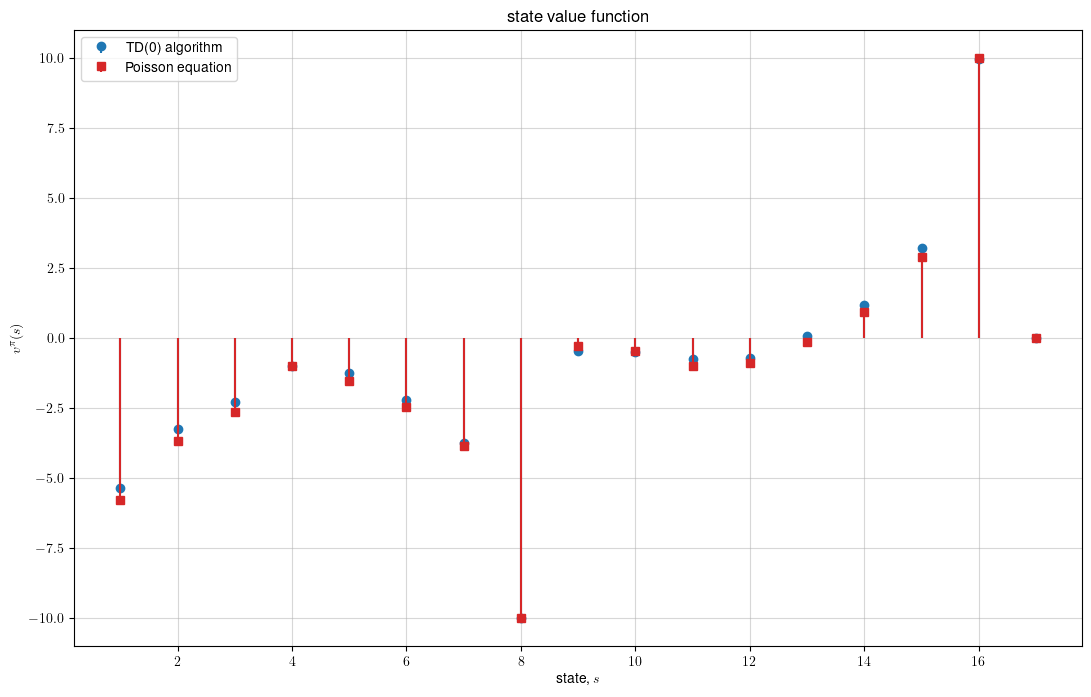

In [10]:
# figure 7 (state-value function, TD(0))

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=13, 8
fig = plt.figure()

ax = fig.add_subplot(111)

markerline, stemlines, baseline = ax.stem(states, vpi_TD_0, label="TD(0) algorithm")
markerline_, stemlines_, baseline_ = ax.stem(states, vpi_poisson, label="Poisson equation")
plt.setp(stemlines_, 'color', 'tab:red')
plt.setp(stemlines, 'linewidth', 1.5)
plt.setp(baseline, 'linewidth', 0)
plt.setp(markerline_, 'color', 'tab:red')
plt.setp(stemlines_, 'linewidth', 1.5)
plt.setp(baseline_, 'linewidth', 0)
plt.setp(markerline_, 'marker', 's')
ax.set_title("state value function")
ax.set_ylabel("$v^{\pi}(s)$")
ax.set_xlabel("state, $s$")
plt.legend()
plt.grid(zorder=0, alpha=0.5)

plt.savefig("figs/fig-7.pdf", format="pdf", bbox_inches="tight")

plt.plot()

In [ ]:
# TD(lambda) algorithm
E = 2000 # number of episodes
vpi = np.random.rand(NS) # random initial state-value vector; NS is number os states
vpi[3] = 0
vpi[10] = 0 # these are the locations of the blocks
t = np.random.rand(NS) # trace values
delta = np.zeros(NS)
gamma = 0.9
mu = 0.01 # step-size
lambda_ = 0.9
max_episode_duration = 50

kernel = np.zeros(NS)

for e in range(E):
    counter = 0
    sample = 1
    while sample == 1:
        idx = np.random.randint(NS-1)+1 # select a random non-exit state index
        if (idx != 4) and (idx != 11) and (idx != 17): # excluding the block locations and exit state
            s = states[idx-1]
            sample = 0
    
    while (s != 17) and (counter < max_episode_duration): # state s different from EXIT state
        policy = Pi[:, s] # pi(a|s) is s-th column of Pi matrix
        act = select_action(policy)

        for j in range(NS):
            kernel[j] = P[s, act, j]
        
        sprime = select_next_state(kernel)
        r = reward[s] # in this example reward is only state s-dependent
        delta[s] = r + gamma*vpi[sprime] - vpi[s]
        for x in range(NS):
            t[x] = lambda_*gamma*t[x] + (s==x)
            vpi[x] += mu*t[x]*delta[x]
        s = sprime
        counter += 1

vpi_TD_lambda = vpi
# finding state value function from Poisson equation for comparison purposes
vpi_poisson = (np.linalg.inv(np.eye(NS)-gamma*Ppi))@rpi


[]

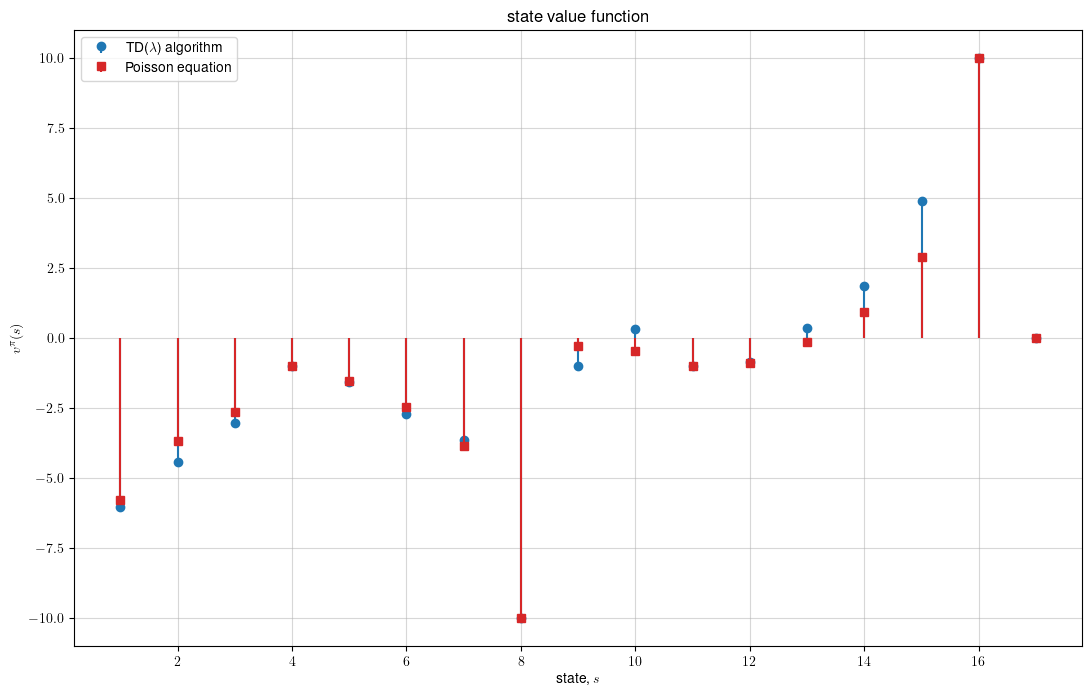

In [12]:
# figure 11 (state-value function, TD(lambda))

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=13, 8
fig = plt.figure()

ax = fig.add_subplot(111)

markerline, stemlines, baseline = ax.stem(states, vpi_TD_lambda, label="TD($\lambda$) algorithm")
markerline_, stemlines_, baseline_ = ax.stem(states, vpi_poisson, label="Poisson equation")
plt.setp(stemlines_, 'color', 'tab:red')
plt.setp(stemlines, 'linewidth', 1.5)
plt.setp(baseline, 'linewidth', 0)
plt.setp(markerline_, 'color', 'tab:red')
plt.setp(stemlines_, 'linewidth', 1.5)
plt.setp(baseline_, 'linewidth', 0)
plt.setp(markerline_, 'marker', 's')
ax.set_title("state value function")
ax.set_ylabel("$v^{\pi}(s)$")
ax.set_xlabel("state, $s$")
plt.legend()
plt.grid(zorder=0, alpha=0.5)

plt.savefig("figs/fig-11.pdf", format="pdf", bbox_inches="tight")

plt.plot()

In [13]:
# True online TD(lambda) algorithm

E = 2000 # number of episodes
vpi = np.random.rand(NS) # random initial state-value vector; NS is number of states
vpi_before = np.zeros(NS)
vpi[3] = 0 
vpi[10] = 0
vpi_before[3] = 0
vpi_before[10] = 0
t = np.random.rand(NS) # trace values
delta = np.zeros(NS)
gamma = 0.9
mu = 0.01 # step-size
lambda_ = 0.9
max_episode_duration = 50

for e in range(E): # iterates over episodes
    counter = 0
    sample = 1
    while sample == 1:
        idx = np.random.randint(NS-1) + 1 # select a random non-exit state index
        if (idx != 4) and (idx != 11) and (idx != 17): # excluding the block locations and exit state
            s = states[idx-1]
            sample = 0

    while (s != 17) and (counter < max_episode_duration): # state s different from exit state
        policy = Pi[:, s] # pi(a|s)
        act = select_action(policy)

        for j in range(NS):
            kernel[j] = P[s, act, j]
        
        sprime = select_next_state(kernel)
        r = reward[s]
        delta[s] = r + gamma*vpi[sprime] - vpi_before[s]
        for x in range(NS):
            t[x] = mu*(s==x)*(1-lambda_*gamma*t[x]) + gamma*lambda_*t[x]
            z = vpi[x] + delta[s]*t[x]+mu*(vpi_before[x]-vpi[x])
            vpi_before[x] = vpi[x]
            vpi[x] = z
        s = sprime
        counter += 1

vpi_TD_true_online = vpi
# finding state value function from Poisson equation for comparison purposes
vpi_poisson = (np.linalg.inv(np.eye(NS)-gamma*Ppi))@rpi 

[]

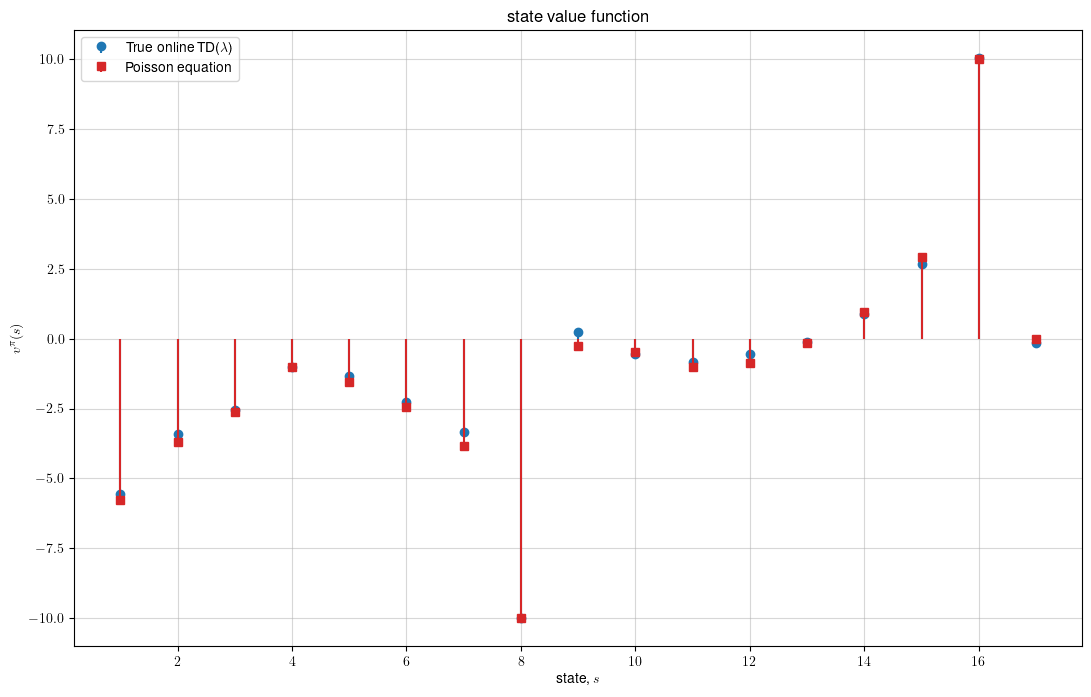

In [14]:
# figure 12 (state-value function, true online TD(lmabda))

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=13, 8
fig = plt.figure()

ax = fig.add_subplot(111)

markerline, stemlines, baseline = ax.stem(states, vpi_TD_true_online, label="True online TD($\lambda$)")
markerline_, stemlines_, baseline_ = ax.stem(states, vpi_poisson, label="Poisson equation")
plt.setp(stemlines_, 'color', 'tab:red')
plt.setp(stemlines, 'linewidth', 1.5)
plt.setp(baseline, 'linewidth', 0)
plt.setp(markerline_, 'color', 'tab:red')
plt.setp(stemlines_, 'linewidth', 1.5)
plt.setp(baseline_, 'linewidth', 0)
plt.setp(markerline_, 'marker', 's')
ax.set_title("state value function")
ax.set_ylabel("$v^{\pi}(s)$")
ax.set_xlabel("state, $s$")
plt.legend()
plt.grid(zorder=0, alpha=0.5)

plt.savefig("figs/fig-12.pdf", format="pdf", bbox_inches="tight")

plt.plot()

In [16]:
# Off-policy TD(0) algorithm
E = 4000 # number of episodes
vpi = np.random.rand(NS) # random initial state-value vector; NS is number os states
vpi[3] = 0
vpi[10] = 0
delta = np.zeros(NS)
gamma = 0.9
mu = 0.01 # step-size
max_episode_duration = 50

for e in range(E): # iterates over episodes
    counter = 0
    sample = 1
    while sample == 1:
        idx = np.random.randint(NS-1)+1 # select a random non-exit state index
        if (idx != 4) and (idx != 11) and (idx != 17): # excluding the block locations and exit state
            s = states[idx]
            sample = 0
    
    while (s!=17) and (counter < max_episode_duration): # state s different from EXIT state
        policy = Phi[:, s] # behavior policy phi(a|s)
        act = select_action(policy)

        for j in range(NS):
            kernel[j] = P[s, act, j]
        sprime = select_next_state(kernel)

        r = reward[s]
        if (Pi[act, s] == 0) and (Phi[act, s] == 0):
            xi = 1
        else:
            xi = Pi[act, s] / Phi[act, s]
        delta[s] = xi*(r+gamma*vpi[sprime]) - vpi[s]
        vpi[s] += mu*delta[s]
        s = sprime
        counter += 1

vpi_TD_off_policy = vpi
# finding state value function from Poisson equation for comparison purposes
vpi_poisson = (np.linalg.inv(np.eye(NS)-gamma*Ppi))@rpi 

[]

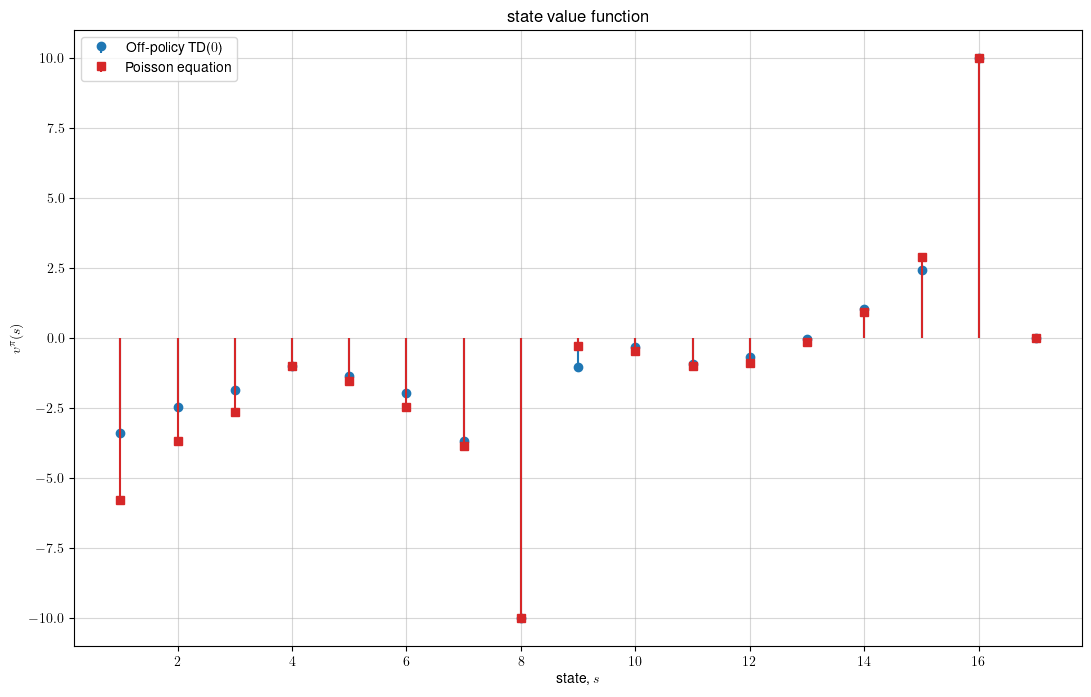

In [18]:
# figure 13 (state-value function, off-policy TD(0))

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=13, 8
fig = plt.figure()

ax = fig.add_subplot(111)

markerline, stemlines, baseline = ax.stem(states, vpi_TD_off_policy, label="Off-policy TD($0$)")
markerline_, stemlines_, baseline_ = ax.stem(states, vpi_poisson, label="Poisson equation")
plt.setp(stemlines_, 'color', 'tab:red')
plt.setp(stemlines, 'linewidth', 1.5)
plt.setp(baseline, 'linewidth', 0)
plt.setp(markerline_, 'color', 'tab:red')
plt.setp(stemlines_, 'linewidth', 1.5)
plt.setp(baseline_, 'linewidth', 0)
plt.setp(markerline_, 'marker', 's')
ax.set_title("state value function")
ax.set_ylabel("$v^{\pi}(s)$")
ax.set_xlabel("state, $s$")
plt.legend()
plt.grid(zorder=0, alpha=0.5)

plt.savefig("figs/fig-13.pdf", format="pdf", bbox_inches="tight")

plt.plot()